# 📂 **Step 1: Load the Dataset**

In [2]:
import pandas as pd

In [3]:
# 📥 Load Dataset
file_path = "generated_travel_data.csv"  
df = pd.read_csv(file_path)

# 📌 **Step 2: Display Basic Information**

In [5]:
# 📊 Display dataset summary, including column data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   departure           50000 non-null  object
 1   destination         50000 non-null  object
 2   departure_date      50000 non-null  object
 3   return_date         50000 non-null  object
 4   budget              50000 non-null  object
 5   season              50000 non-null  object
 6   suggestions         50000 non-null  object
 7   flight_price        50000 non-null  object
 8   hotel_price         50000 non-null  object
 9   activities_charges  50000 non-null  object
 10  estimated_charge    50000 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB


In [6]:
# 🔍 Preview the first five rows of the dataset
df.head()

,departure,destination,departure_date,return_date,budget,season,suggestions,flight_price,hotel_price,activities_charges,estimated_charge
0,USA,Tokyo,20-12-2025,04-01-2026,Cheap,Winter,"Sightseeing, Adventure",$1317.0,$711.0,$703.2,$2731.2
1,Canada,New York,25-10-2025,08-11-2025,Luxury,Fall,"Adventure, Sightseeing, Nightlife, Cultural Tour",$1872.0,$598.4,$523.6,$2994.0
2,Canada,Paris,16-12-2025,31-12-2025,Luxury,Winter,"Sightseeing, Shopping",$2067.2,$1417.6,$294.0,$3778.7999999999997
3,Japan,Bangkok,14-04-2025,25-04-2025,Moderate,Spring,Nightlife,$1379.3,$978.9,$480.7,$2838.8999999999996
4,India,New York,27-10-2025,02-11-2025,Moderate,Fall,"Relaxation, Cultural Tour, Shopping, Food",$791.7,$596.7,$733.6,$2122.0


In [7]:
# 📊 Generate summary statistics for all columns
df.describe(include='all')

,departure,destination,departure_date,return_date,budget,season,suggestions,flight_price,hotel_price,activities_charges,estimated_charge
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,10,10,336,372,3,4,2080,2801,1681,1768,25387
top,South Africa,Bangkok,28-04-2025,26-09-2025,Cheap,Winter,Adventure,$1040.0,$624.0,$546.0,$2433.6
freq,5060,5102,186,183,16670,12666,1647,64,92,85,14


In [8]:
# 📊 Display column names and their data types in a structured format  
print("📊 Data Types of All Columns:\n")
for col, dtype in df.dtypes.items():
    print(f"  🔹 {col:<20} ➝  {dtype}")

# 🛠️ Identify columns that are of type 'object' (categorical/text data) 
object_columns = df.select_dtypes(include=['object']).columns.tolist()

📊 Data Types of All Columns:

  🔹 departure            ➝  object
  🔹 destination          ➝  object
  🔹 departure_date       ➝  object
  🔹 return_date          ➝  object
  🔹 budget               ➝  object
  🔹 season               ➝  object
  🔹 suggestions          ➝  object
  🔹 flight_price         ➝  object
  🔹 hotel_price          ➝  object
  🔹 activities_charges   ➝  object
  🔹 estimated_charge     ➝  object


In [9]:
# 🔢 Count unique values for all columns
df.nunique()

# 🔍 Display unique values in categorical columns 
for col in df.select_dtypes(include=['object']):
    print(f"Unique values in {col}:", df[col].unique(), "\n")

Unique values in departure: ['USA' 'Canada' 'Japan' 'India' 'Germany' 'Australia' 'Brazil' 'France'
 'UK' 'South Africa'] 

Unique values in destination: ['Tokyo' 'New York' 'Paris' 'Bangkok' 'Sydney' 'Cape Town' 'Toronto'
 'Singapore' 'Dubai' 'Rome'] 

Unique values in departure_date: ['20-12-2025' '25-10-2025' '16-12-2025' '14-04-2025' '27-10-2025'
 '21-11-2025' '10-04-2025' '22-01-2025' '20-10-2025' '19-04-2025'
 '17-07-2025' '22-12-2025' '25-03-2025' '03-02-2025' '10-07-2025'
 '28-07-2025' '24-11-2025' '25-09-2025' '01-07-2025' '25-08-2025'
 '17-08-2025' '11-05-2025' '03-11-2025' '12-08-2025' '13-08-2025'
 '06-10-2025' '19-08-2025' '02-04-2025' '11-11-2025' '22-02-2025'
 '23-05-2025' '06-01-2025' '18-05-2025' '18-03-2025' '07-07-2025'
 '03-06-2025' '16-10-2025' '22-03-2025' '01-05-2025' '13-12-2025'
 '18-11-2025' '16-09-2025' '12-05-2025' '28-11-2025' '20-09-2025'
 '21-04-2025' '18-08-2025' '08-02-2025' '25-01-2025' '01-09-2025'
 '14-07-2025' '07-10-2025' '11-10-2025' '11-09-2025' 

In [10]:
# 📊 Display count of each category in 'budget' column
print("📊 **Category Counts in 'Budget' Column:**\n")
for category, count in df['budget'].value_counts().items():
    print(f"  🔹 {category:<10} ➝ {count:,} entries")

# 📊 Display percentage of each category in 'budget' column
print("\n📊 **Percentage Distribution of 'Budget' Categories:**\n")
for category, percentage in df['budget'].value_counts(normalize=True).items():
    print(f"  🔹 {category:<10} ➝ {percentage:.2f}%")

📊 **Category Counts in 'Budget' Column:**

  🔹 Cheap      ➝ 16,670 entries
  🔹 Moderate   ➝ 16,667 entries
  🔹 Luxury     ➝ 16,663 entries

📊 **Percentage Distribution of 'Budget' Categories:**

  🔹 Cheap      ➝ 0.33%
  🔹 Moderate   ➝ 0.33%
  🔹 Luxury     ➝ 0.33%


# 🚀 **Step 3: Data Cleaning & Preprocessing**

In [12]:
# 🏷️ List of price-related columns
price_columns = ["flight_price", "hotel_price", "activities_charges", "estimated_charge"]

# 💰 Remove "$" and convert to float  
for col in price_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

In [13]:
# 🎯 Function to calculate activity charges based on interests count
def calculate_activities_charges(suggestions):
    num_interests = len(suggestions.split(", "))  # Count number of interests
    if num_interests == 1:
        return 100
    elif num_interests == 2:
        return 200
    else:
        return 400  # 3 or more interests

df["recomputed_activities_charges"] = df["suggestions"].apply(calculate_activities_charges)

# 🔄 Apply function to recompute activity charges
df["recomputed_total"] = df["flight_price"] + df["hotel_price"] + df["recomputed_activities_charges"]

In [14]:
# 🔍 Display relevant columns to check recalculations
df[["departure", "destination", "departure_date", "return_date", "flight_price", "hotel_price", "recomputed_activities_charges", "recomputed_total"]].head()

,departure,destination,departure_date,return_date,flight_price,hotel_price,recomputed_activities_charges,recomputed_total
0,USA,Tokyo,20-12-2025,04-01-2026,1317.0,711.0,200,2228.0
1,Canada,New York,25-10-2025,08-11-2025,1872.0,598.4,400,2870.4
2,Canada,Paris,16-12-2025,31-12-2025,2067.2,1417.6,200,3684.8
3,Japan,Bangkok,14-04-2025,25-04-2025,1379.3,978.9,100,2458.2
4,India,New York,27-10-2025,02-11-2025,791.7,596.7,400,1788.4


In [15]:
# 🛠️ Function to correct ordinal suffix in dates with robust error handling  
def correct_ordinal(date_str):
     # ✅ Handle NaN, NaT, or invalid values
    if pd.isna(date_str) or date_str == 'NaT' or not isinstance(date_str, str):
        return date_str
    
    try:
        # 📅 If date is in "DD-MM-YYYY" format, extract day, month, and year
        if '-' in date_str:
            
            parts = date_str.split('-')
            if len(parts) == 3:
                day = int(parts[0])
                
                # Convert month number to name
                month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                               'July', 'August', 'September', 'October', 'November', 'December']
                month = month_names[int(parts[1]) - 1]
                
                year = parts[2]
            else:
                return date_str  
        elif ' ' in date_str:
            # 📅 If format is already "DDth Month YYYY", extract components 
            parts = date_str.split(' ')
            if len(parts) != 3:
                return date_str
            
            day = int(parts[0].rstrip('thstndrd'))
            month = parts[1]
            year = parts[2]
        else:
            return date_str 
        
        # 🏷️ Apply the correct ordinal suffix
        suffix = "th" if 11 <= day <= 13 else {1: "st", 2: "nd", 3: "rd"}.get(day % 10, "th")
        return f"{day}{suffix} {month} {year}"
    except:
         # 🚨 Return original value if any error occurs  
        return date_str

In [16]:
# 🛠️ Apply ordinal correction to departure and return dates
df["departure_date"] = df["departure_date"].apply(lambda x: correct_ordinal(x))
df["return_date"] = df["return_date"].apply(lambda x: correct_ordinal(x))

In [17]:
# 📅 Display formatted departure dates 
print("📅 Departure Dates (First 5 Entries):")
print("\n".join(f"  {i+1}. {date}" for i, date in enumerate(df["departure_date"].head().tolist())))

# 📅 Display formatted return dates
print("\n📅 Return Dates (First 5 Entries):")
print("\n".join(f"  {i+1}. {date}" for i, date in enumerate(df["return_date"].head().tolist())))

📅 Departure Dates (First 5 Entries):
  1. 20th December 2025
  2. 25th October 2025
  3. 16th December 2025
  4. 14th April 2025
  5. 27th October 2025

📅 Return Dates (First 5 Entries):
  1. 4th January 2026
  2. 8th November 2025
  3. 31st December 2025
  4. 25th April 2025
  5. 2nd November 2025


In [18]:
import sys
!{sys.executable} -m pip install prettytable termcolor

In [19]:
from tabulate import tabulate
from termcolor import colored

# 🎯 Define column groups
trip_headers = ["departure", "destination", "departure_date", "return_date", "budget", "season", "suggestions"]
price_headers = ["flight_price", "hotel_price", "activities_charges", "estimated_charge"]

# 🎨 Style headers
styled_trip_headers = [colored(header.replace("_", " ").title(), "cyan", attrs=["bold"]) for header in trip_headers]
styled_price_headers = [colored(header.replace("_", " ").title(), "cyan", attrs=["bold"]) for header in price_headers]

# 📋 Copy first 5 rows for display
df_display = df.head(5).copy()

# ✈️ Apply formatting for trip details
df_display["departure"] = df_display["departure"].apply(lambda x: colored(x, "yellow"))
df_display["destination"] = df_display["destination"].apply(lambda x: colored(x, "yellow"))
df_display["departure_date"] = df_display["departure_date"].apply(lambda x: colored(x, "green"))
df_display["return_date"] = df_display["return_date"].apply(lambda x: colored(x, "green"))
df_display["budget"] = df_display["budget"].apply(lambda x: colored(x, "magenta"))
df_display["season"] = df_display["season"].apply(lambda x: colored(x, "blue"))
df_display["suggestions"] = df_display["suggestions"].apply(lambda x: colored(x, "white"))

# 💰 Apply formatting for pricing details  
df_display["flight_price"] = df_display["flight_price"].apply(lambda x: f"${float(x):,.2f}")
df_display["hotel_price"] = df_display["hotel_price"].apply(lambda x: f"${float(x):,.2f}")
df_display["activities_charges"] = df_display["activities_charges"].apply(lambda x: f"${float(x):,.2f}")
df_display["estimated_charge"] = df_display["estimated_charge"].apply(lambda x: f"${float(x):,.2f}")

# 🏆 Display Trip Details Table 
print("\n🎯 " + colored("TRIP DETAILS", "red", attrs=["bold", "underline"]) + "\n")
print(tabulate(df_display[trip_headers], headers=styled_trip_headers, tablefmt="rounded_grid", showindex=False))

# 💰 Display Pricing Table
print("\n💰 " + colored("PRICING DETAILS", "red", attrs=["bold", "underline"]) + "\n")
print(tabulate(df_display[price_headers], headers=styled_price_headers, tablefmt="rounded_grid", showindex=False))


🎯 TRIP DETAILS

╭─────────────┬───────────────┬────────────────────┬────────────────────┬──────────┬──────────┬──────────────────────────────────────────────────╮
│ Departure   │ Destination   │ Departure Date     │ Return Date        │ Budget   │ Season   │ Suggestions                                      │
├─────────────┼───────────────┼────────────────────┼────────────────────┼──────────┼──────────┼──────────────────────────────────────────────────┤
│ USA         │ Tokyo         │ 20th December 2025 │ 4th January 2026   │ Cheap    │ Winter   │ Sightseeing, Adventure                           │
├─────────────┼───────────────┼────────────────────┼────────────────────┼──────────┼──────────┼──────────────────────────────────────────────────┤
│ Canada      │ New York      │ 25th October 2025  │ 8th November 2025  │ Luxury   │ Fall     │ Adventure, Sightseeing, Nightlife, Cultural Tour │
├─────────────┼───────────────┼────────────────────┼────────────────────┼──────────┼──────────┼──────

# 🚀 **Step 4: Data Analysis & Data Visualization**


📊 AVERAGE FLIGHT PRICES BY DESTINATION

╭───────────────┬────────────────────────────╮
│ Destination   │ Average Flight Price ($)   │
├───────────────┼────────────────────────────┤
│ Singapore     │ $1,287.14                  │
├───────────────┼────────────────────────────┤
│ Cape Town     │ $1,294.84                  │
├───────────────┼────────────────────────────┤
│ Tokyo         │ $1,297.12                  │
├───────────────┼────────────────────────────┤
│ Bangkok       │ $1,298.27                  │
├───────────────┼────────────────────────────┤
│ Rome          │ $1,298.62                  │
├───────────────┼────────────────────────────┤
│ Toronto       │ $1,300.30                  │
├───────────────┼────────────────────────────┤
│ Paris         │ $1,304.64                  │
├───────────────┼────────────────────────────┤
│ Sydney        │ $1,305.22                  │
├───────────────┼────────────────────────────┤
│ Dubai         │ $1,306.43                  │
├───────────────┼──

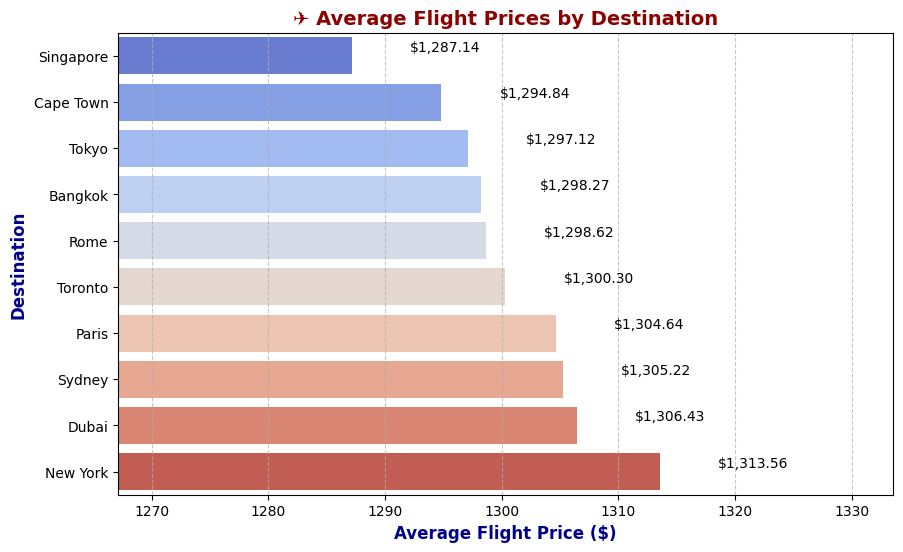

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from tabulate import tabulate
from termcolor import colored

# 🚀 Ignore warnings
warnings.filterwarnings("ignore")

# ✅ Ensure flight_price is numeric 
df["flight_price"] = pd.to_numeric(df["flight_price"], errors="coerce")

# 🔥 Drop NaN values
df = df.dropna(subset=["flight_price"])

# 📊 Calculate average flight price per destination
avg_flight_prices = df.groupby("destination")["flight_price"].mean().sort_values()

# 📌 1️⃣ Beautifully Print the Data
styled_headers = [colored("Destination", "cyan", attrs=["bold"]), 
                  colored("Average Flight Price ($)", "magenta", attrs=["bold"])]

# 🎨 Format prices for readability 
formatted_prices = [[colored(dest, "yellow"), f"${price:,.2f}"] for dest, price in avg_flight_prices.items()]

# 🏆 Print a nicely formatted table 
print("\n📊 " + colored("AVERAGE FLIGHT PRICES BY DESTINATION", "red", attrs=["bold", "underline"]) + "\n")
print(tabulate(formatted_prices, headers=styled_headers, tablefmt="rounded_grid"))

# 📌 2️⃣ Enhanced Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=avg_flight_prices.index, x=avg_flight_prices.values, palette="coolwarm", orient="h")

# ✨ Add price labels on bars 
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.2f}', (p.get_width() + 5, p.get_y() + 0.3), fontsize=10, color='black')

# 🎯 Adjust visualization settings 
plt.xlim(min(avg_flight_prices) - 20, max(avg_flight_prices) + 20)  
plt.xlabel("Average Flight Price ($)", fontsize=12, fontweight='bold', color="darkblue")
plt.ylabel("Destination", fontsize=12, fontweight='bold', color="darkblue")
plt.title("✈️ Average Flight Prices by Destination", fontsize=14, fontweight="bold", color="darkred")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 📊 Show the plot
plt.show()

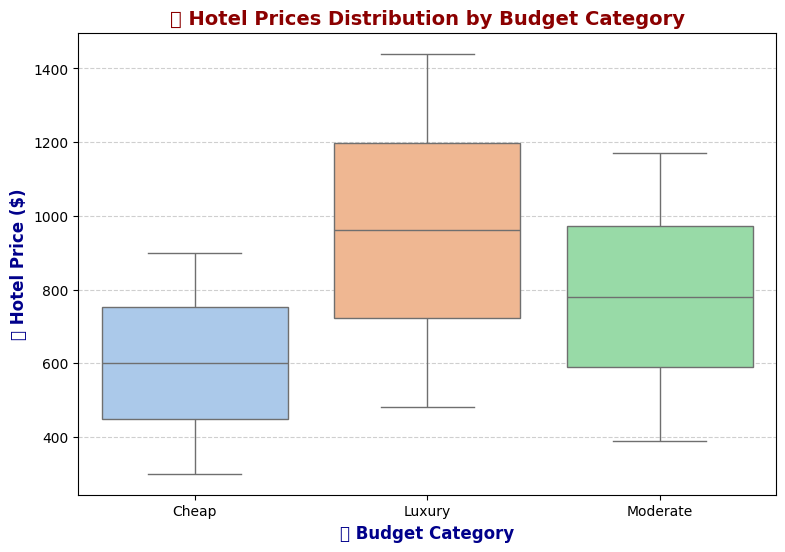

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# ✅ Ensure hotel_price is numeric 
df["hotel_price"] = pd.to_numeric(df["hotel_price"], errors="coerce")

# 🔥 Drop NaN values  
df = df.dropna(subset=["hotel_price", "budget"])

# 🎯 Define budget categories logically
budget_order = ["Low", "Medium", "High"] if "Low" in df["budget"].unique() else sorted(df["budget"].unique())

plt.figure(figsize=(9, 6))

# 📊 Boxplot for hotel prices by budget category
sns.boxplot(x=df["budget"], y=df["hotel_price"], palette="pastel", order=budget_order, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 6})

# ✨ Titles and Labels 
plt.xlabel("💰 Budget Category", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("🏨 Hotel Price ($)", fontsize=12, fontweight="bold", color="darkblue")
plt.title("📊 Hotel Prices Distribution by Budget Category", fontsize=14, fontweight="bold", color="darkred")

# 🎯 Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 📊 Show the plot 
plt.show()

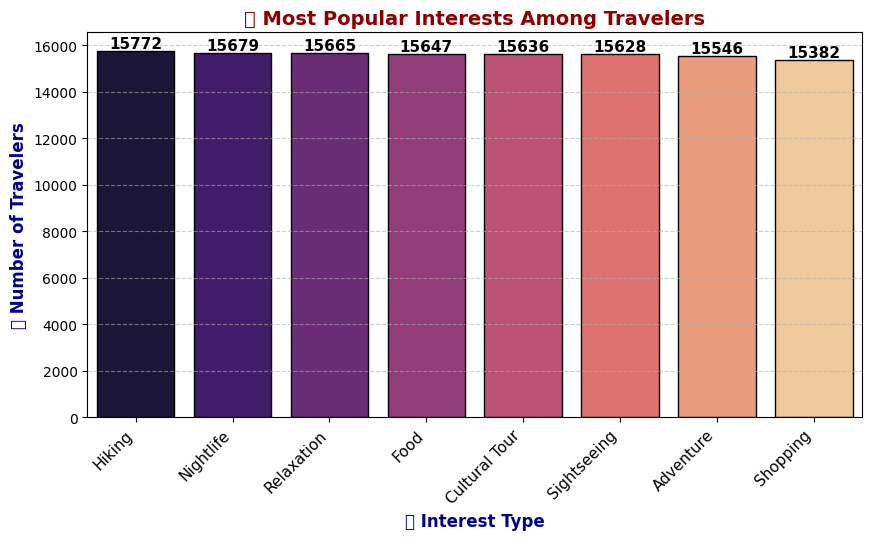

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 🔥 Handle missing values & split interests
df["suggestions"] = df["suggestions"].fillna("")  # Replace NaN with empty strings
all_interests = [interest.strip() for sublist in df["suggestions"].str.split(",") for interest in sublist if interest]

# 📊 Count occurrences
interest_counts = Counter(all_interests)

# 📌 Convert to DataFrame & sort
interest_df = pd.DataFrame(interest_counts.items(), columns=["Interest", "Count"]).sort_values(by="Count", ascending=False)

# 🎯 Limit to Top-N interests for better visualization
top_n = 10
interest_df = interest_df.head(top_n)

# ✨ Set figure size
plt.figure(figsize=(10, 5))

# 📊 Bar plot with custom colors & grid background
ax = sns.barplot(x="Interest", y="Count", data=interest_df, palette="magma", edgecolor="black")

# 🔢 Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight="bold", color="black")

# 🎨 Titles & Labels
plt.xlabel("🌍 Interest Type", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("👥 Number of Travelers", fontsize=12, fontweight="bold", color="darkblue")
plt.title("🔥 Most Popular Interests Among Travelers", fontsize=14, fontweight="bold", color="darkred")

# 🎯 Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=11)

# 📌 Gridlines for improved clarity
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 📊 Show the plot
plt.show()

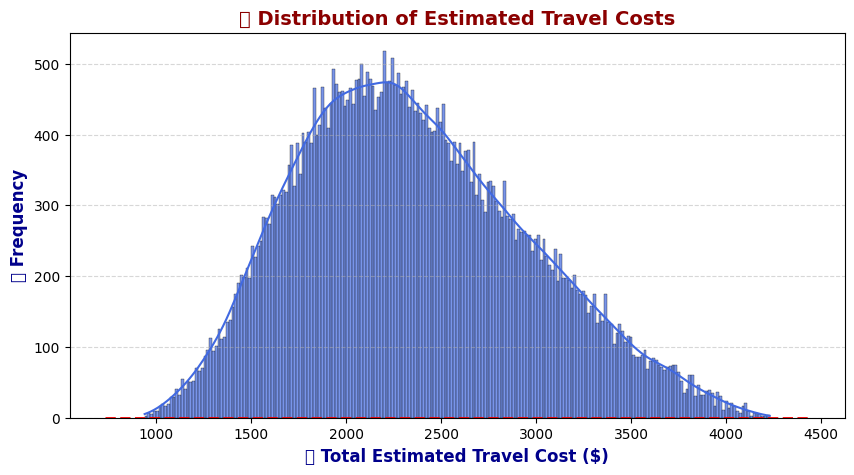

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Ensure 'recomputed_total' is numeric
df["recomputed_total"] = pd.to_numeric(df["recomputed_total"], errors="coerce")

# 🚀 Drop NaN values
df = df.dropna(subset=["recomputed_total"])

# 📊 Define dynamic bins using Sturges’ Rule for optimal bin count
num_bins = int(len(df["recomputed_total"]) ** 0.5) if len(df["recomputed_total"]) > 30 else 30

plt.figure(figsize=(10, 5))

# 🎨 Histogram with KDE overlay
sns.histplot(df["recomputed_total"], bins=num_bins, kde=True, color="royalblue", alpha=0.7)

# 🔥 KDE Line with Enhanced Styling
sns.kdeplot(df["recomputed_total"], color="red", linestyle="--", linewidth=2)

# 🎯 Titles and Labels
plt.xlabel("💰 Total Estimated Travel Cost ($)", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("📊 Frequency", fontsize=12, fontweight="bold", color="darkblue")
plt.title("📉 Distribution of Estimated Travel Costs", fontsize=14, fontweight="bold", color="darkred")

# 📌 Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# 📊 Show the plot
plt.show()

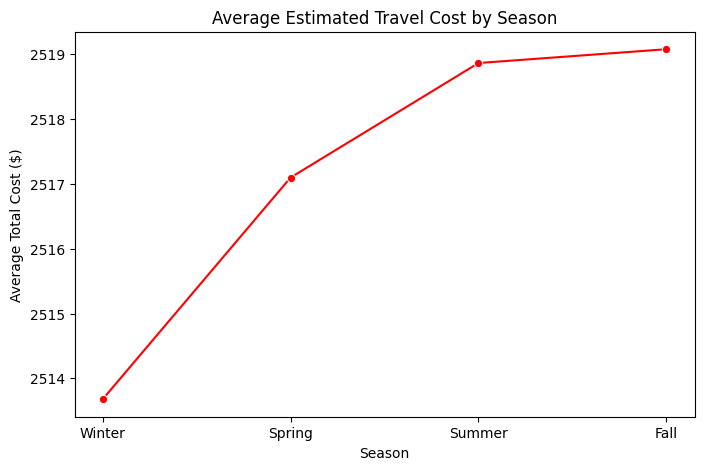

In [25]:
plt.figure(figsize=(8, 5))

# 📊 Average cost per season (sorted properly)
season_costs = df.groupby("season")["estimated_charge"].mean().sort_values()

# 🔥 Line Plot with Styling
sns.lineplot(x=season_costs.index, y=season_costs.values, marker="o", color="red")

# 🎯 Labels 
plt.xlabel("Season")
plt.ylabel("Average Total Cost ($)")
plt.title("Average Estimated Travel Cost by Season")

# 📊 Show the plot
plt.show()

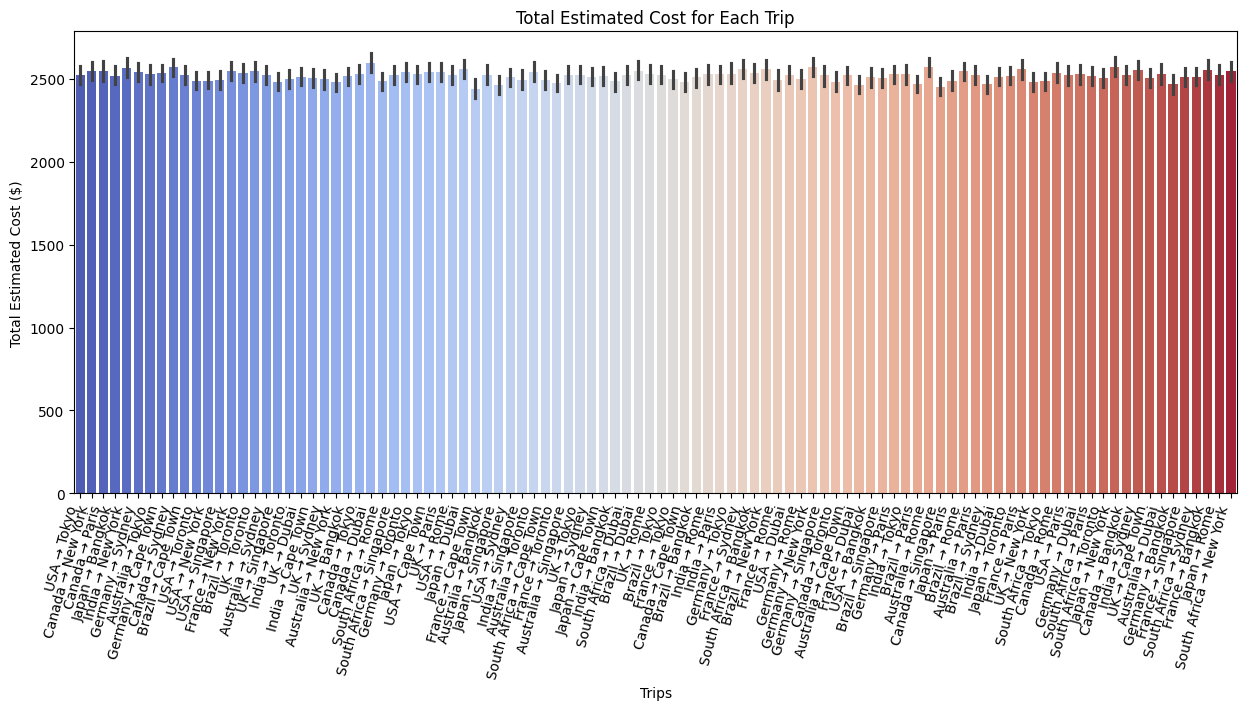

In [26]:
# 📏 Increased figure size for better clarity
plt.figure(figsize=(15, 6))  

# 🎯 Construct trip labels
trip_names = df["departure"] + " → " + df["destination"]

# 📊 Create a bar plot
sns.barplot(x=trip_names, y=df["estimated_charge"], palette="coolwarm")

# 🏷️ Labels and formatting
plt.xticks(rotation=75, ha="right", fontsize=10)  # Rotate more for better readability
plt.xlabel("Trips")
plt.ylabel("Total Estimated Cost ($)")
plt.title("Total Estimated Cost for Each Trip")

# 📊 Display the plot
plt.show()

## 🚀 **Step 5: Feature Extraction & Train-Test Split**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# 🛠 Copy dataset to prevent unintended modifications
df_model = df.copy()

# 📆 Extract numerical features from dates
df_model["departure_day"] = df_model["departure_date"].str.split(" ").str[0].str[:-2].astype(int)
df_model["departure_month"] = df_model["departure_date"].str.split(" ").str[1]

df_model["return_day"] = df_model["return_date"].str.split(" ").str[0].str[:-2].astype(int)
df_model["return_month"] = df_model["return_date"].str.split(" ").str[1]

# 🔠 Encode categorical features using LabelEncoder
encoder = LabelEncoder()
df_model["departure"] = encoder.fit_transform(df_model["departure"])
df_model["destination"] = encoder.fit_transform(df_model["destination"])
df_model["budget"] = encoder.fit_transform(df_model["budget"])
df_model["season"] = encoder.fit_transform(df_model["season"])
df_model["departure_month"] = encoder.fit_transform(df_model["departure_month"])
df_model["return_month"] = encoder.fit_transform(df_model["return_month"])

# 🎯 Selecting features (X) and target variable (y)
X = df_model[["departure", "destination", "departure_day", "departure_month", "return_day", "return_month", 
              "flight_price", "hotel_price", "recomputed_activities_charges"]]
y = df_model["recomputed_total"]

# ✂ Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,departure,destination,departure_day,departure_month,return_day,return_month,flight_price,hotel_price,recomputed_activities_charges
39087,7,6,6,7,16,7,1092.8,804.8,400
30893,2,6,11,6,24,6,644.0,581.0,400
45278,9,2,20,1,31,1,1584.0,1350.4,400
16398,7,0,20,1,26,1,683.0,328.0,100
13653,5,1,27,2,3,4,1761.6,1416.0,200


## 🚀 **Step 6: Model Training & Performance Evaluation**   

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🎯 Define regression models with optimized hyperparameters
models = {
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
}

# 📊 Dictionary to store model performance results
results = {}

# 🚀 Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict values
    
    # 📏 Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # 📏 Compute evaluation metrics
    results[model_name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# 📢 Display formatted results
print("\n📊 🔥 Model Performance Comparison 🔥 📊\n")
for model_name, metrics in results.items():
    print(f"🚀 **{model_name} Model Performance:**")
    print(f"✅ Mean Absolute Error (MAE): **{metrics['MAE']:.2f}**")
    print(f"✅ Root Mean Squared Error (RMSE): **{metrics['RMSE']:.2f}**")
    print(f"✅ R² Score: **{metrics['R² Score']:.4f}**")
    print("-" * 50)


📊 🔥 Model Performance Comparison 🔥 📊

🚀 **XGBoost Model Performance:**
✅ Mean Absolute Error (MAE): **5.57**
✅ Root Mean Squared Error (RMSE): **7.17**
✅ R² Score: **0.9999**
--------------------------------------------------
🚀 **Random Forest Model Performance:**
✅ Mean Absolute Error (MAE): **11.17**
✅ Root Mean Squared Error (RMSE): **15.04**
✅ R² Score: **0.9994**
--------------------------------------------------
🚀 **Gradient Boosting Model Performance:**
✅ Mean Absolute Error (MAE): **6.08**
✅ Root Mean Squared Error (RMSE): **7.83**
✅ R² Score: **0.9998**
--------------------------------------------------


## 🚀 **Step 7: Model Performance Analysis & Visualization**

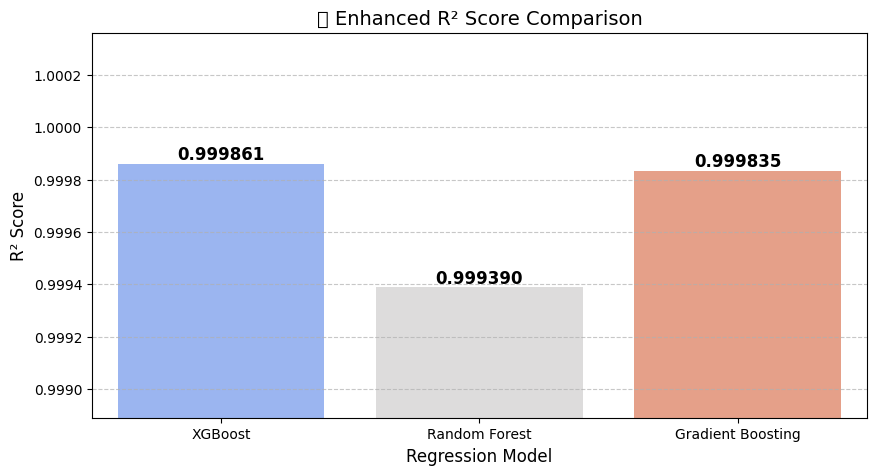

In [32]:
# 📌 Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🎯 Define Regression Models with Optimized Hyperparameters
models = {
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
}

# 📊 Dictionary to Store Model Performance Results
results = {}
predictions = {}

# 🚀 Train and Evaluate Each Model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict values
    
    # 📏 Compute Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # 📊 Store Results
    results[model_name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}
    predictions[model_name] = y_pred  # Store predictions for scatter plot

# 📊 Convert Results to a DataFrame
results_df = pd.DataFrame(results).T

# 🎨 **1️⃣ Improved R² Score Comparison Visualization**
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="coolwarm")

# 🏷 Annotate bars with exact R² values
for i, r2 in enumerate(results_df["R² Score"]):
    ax.text(i, r2, f"{r2:.6f}", ha="center", va="bottom", fontsize=12, fontweight='bold', color='black')

plt.xlabel("Regression Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.title("📊 Enhanced R² Score Comparison", fontsize=14)

# 🚀 Dynamically Adjust Y-axis Based on min/max R² values
plt.ylim(min(results_df["R² Score"]) - 0.0005, max(results_df["R² Score"]) + 0.0005)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Figure size 1000x500 with 0 Axes>

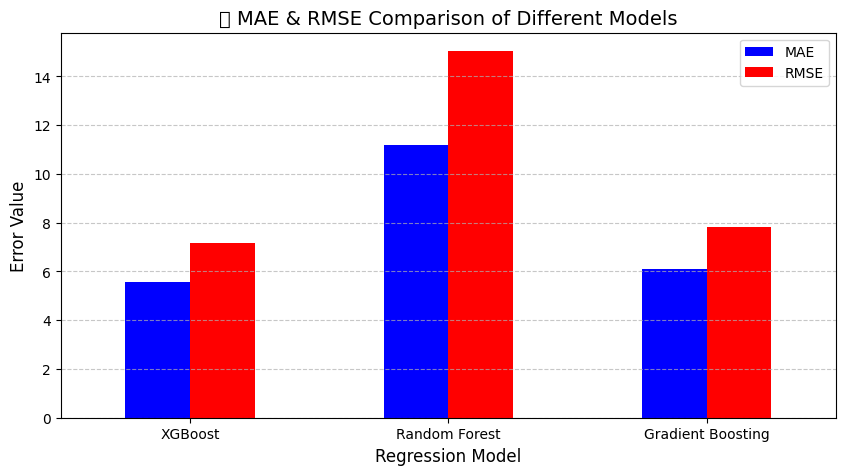

In [33]:
# 📊 **2️⃣ Error Metrics (MAE & RMSE) Comparison**
plt.figure(figsize=(10, 5))
results_df[["MAE", "RMSE"]].plot(kind="bar", figsize=(10, 5), color=["blue", "red"])
plt.xlabel("Regression Model", fontsize=12)
plt.ylabel("Error Value", fontsize=12)
plt.title("📊 MAE & RMSE Comparison of Different Models", fontsize=14)
plt.legend(["MAE", "RMSE"], loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()

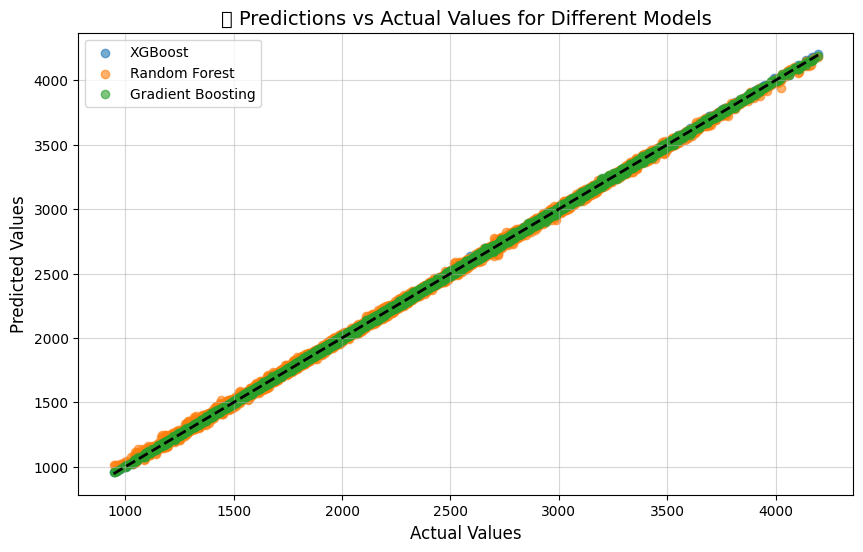

In [34]:
# 📊 **3️⃣ Predictions vs Actual Scatter Plot**
plt.figure(figsize=(10, 6))
for model_name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="--", linewidth=2)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("📊 Predictions vs Actual Values for Different Models", fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

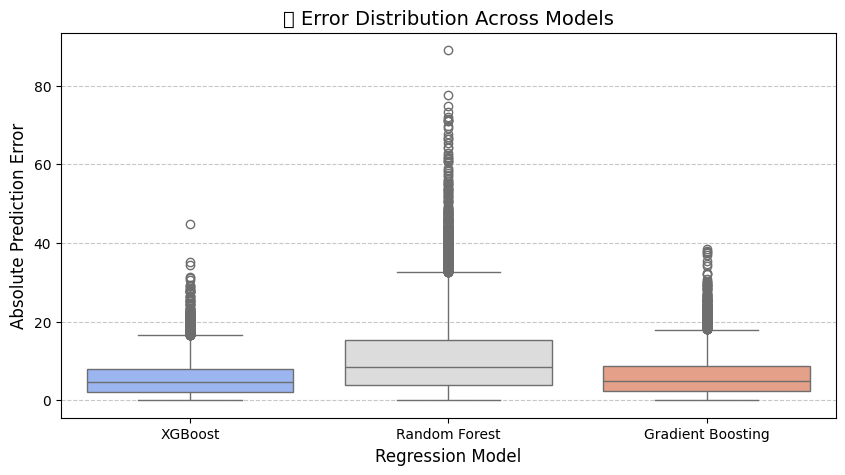

In [35]:
# 📊 **4️⃣ Box Plot of Errors**
errors = {model_name: np.abs(y_test - y_pred) for model_name, y_pred in predictions.items()}
errors_df = pd.DataFrame(errors)

plt.figure(figsize=(10, 5))
sns.boxplot(data=errors_df, palette="coolwarm")
plt.xlabel("Regression Model", fontsize=12)
plt.ylabel("Absolute Prediction Error", fontsize=12)
plt.title("📊 Error Distribution Across Models", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## 🚀 **Step 8: Save & Load the Model**

In [37]:
# Load the saved XGBoost model
# with open("xgb_model.pkl", "rb") as model_file:
#    loaded_xgb_model = pickle.load(model_file)

# print("✅ XGBoost model loaded successfully!")